# Seattle Airbnb Data Analysis
## CRISP-DM PROCESS

### Business Understanding 
In this project, I am using the Seattle Airbnb open dataset from Kaggle to discover a few key aspects of the Airbnb renting scene in Seattle. The information can be used to help potential hosts assess the possibility of using their properties for Airbnb renting, for guests to consider using Airbnb as accomodation options, and for current hosts or Airbnb itself to assess the sentiment of guests using their services. 

A few questions this project seeks to understand are: 
1. What is the average listing Price based on Location/Seattle Neighborhood
2. What is the occupancy pattern based on Weekday and season 
3. What are the earnings and reviews by host 
4. How much should the host set their listing price
5. And what guests say about their Airbnb experience

## Data Understanding
There are 3 files in the dataset: 
1. **listing.csv**: provides information about hosts, price, room types, property types, listing summary, number of reviews etc. about 3818 Airbnb listings in Seattle. 
    - There are 44 columns with missing data ranging from 0.01% to 100% missing 
    - Columns with the most missing data are: license, square feet, monthly_price, security deposit, weekly_price, notes, etc.
    - There are 2751 hosts in the data and 20% of them are superhosts (Read: [What is Superhost](https://www.airbnb.com/help/article/828/what-is-a-superhost) )
2. **calendar.csv**: provides information about occupancy and availability for 2873 listing everyday from January 2016 - January 2017
    - There are 4 columns in the calendar dataset: listing ID, Date, Availability (t: available, f: occupied), Price
    - If the listing is occupied, there will be price for that listing for that date. Therefore, price is the only column with N/A value in this dataset
3. **reviews.csv**: provides 84849 reviews for each property from 2009
    - About 3191 listings have about 85k reviews from 2009-2016 
    - 18 of these reviews have missing comments

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
# import necessary packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image

# import packages for sentiment analysis
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from textblob import TextBlob
#from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
#from sklearn.feature_extraction import text 

#import nltk
#from nltk.tokenize import word_tokenize 
#from nltk import pos_tag, bigrams, FreqDist, ne_chunk

#import detectEnglish

#import packages for price prediction
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor

In [63]:
listing = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
review = pd.read_csv('reviews.csv')

In [64]:
print(f"Listing dataset has {listing.shape[0]} records")
print(f"Calendar dataset has {calendar.shape[0]} records")
print(f"Review dataset has {review.shape[0]} records")

Listing dataset has 3818 records
Calendar dataset has 1393570 records
Review dataset has 84849 records


In [65]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [66]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [67]:
listing.shape

(3818, 92)

In [68]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

## Data Preparation

In [69]:
#clean the 'price' column and convert to float64
listing['cleaned_price'] = listing['price'].str.replace("$","")
listing['cleaned_price']  = listing['cleaned_price'].str.replace("'","")
listing['cleaned_price'] = listing['cleaned_price'].str.replace(",","")
listing['cleaned_price'] = listing['cleaned_price'].astype('float')

/tmp/ipykernel_1532/3316200753.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing['cleaned_price'] = listing['price'].str.replace("$","")


In [71]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [20]:
list(listing.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [74]:
#number of unique hosts
unique_host = listing['host_id'].unique()
'Number of unique hosts in listing dataset:', len(unique_host)

('Number of unique hosts in listing dataset:', 2751)

In [75]:
#clean the 'price' column and convert to float64
listing['cleaned_price'] = listing['price'].str.replace("$","")
listing['cleaned_price']  = listing['cleaned_price'].str.replace("'","")
listing['cleaned_price'] = listing['cleaned_price'].str.replace(",","")
listing['cleaned_price'] = listing['cleaned_price'].astype('float')

/tmp/ipykernel_1532/3316200753.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing['cleaned_price'] = listing['price'].str.replace("$","")


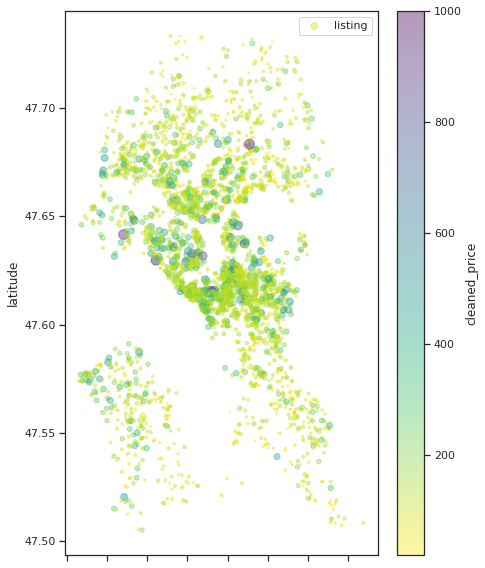

In [76]:
# Price based on geographical data
listing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4
             ,s=listing['cleaned_price']/10
             , label = 'listing'
            , c = 'cleaned_price', figsize =(7,10)
            , cmap = plt.get_cmap("viridis_r")
            , colorbar=True);

plt.legend();

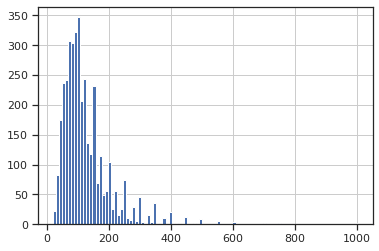

In [77]:
listing["cleaned_price"].hist(bins=100);

In [78]:
# Pick the variables for price prediction
subset_col = ['neighbourhood_group_cleansed','room_type','bed_type','bedrooms','bathrooms','beds','host_is_superhost'
          ,'accommodates', 'number_of_reviews',"cleaned_price"]

subset = listing[subset_col]

/tmp/ipykernel_1532/3036824596.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = subset.corr()


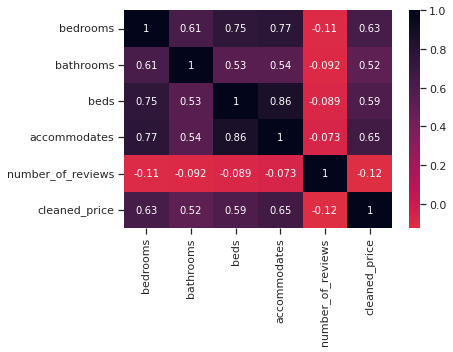

In [79]:
# A correlation matrix between continuous variables and y
corr = subset.corr()
cmap = sns.cm.rocket_r
ax = sns.heatmap(corr, annot=True, center = 0, cmap=cmap, linecolor='white')

In [81]:
sns.set(style="ticks", color_codes=True)

In [82]:
# Split train and test set using StratifiedShuffleSplit to reserve the proportion of listing by location 
## as location is likely to have influence on price 

split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state=42)

for train_index, test_index in split.split(subset, subset['neighbourhood_group_cleansed']):
    strat_train_set = subset.loc[train_index]
    strat_test_set = subset.loc[test_index]
    
print('From {} listings, there are {} listings in train set, and {} listings in test set'
      .format(len(subset),len(strat_train_set), len(strat_test_set)))

From 3818 listings, there are 3054 listings in train set, and 764 listings in test set


In [83]:
#check the proportion of listings by neighborhood group between the original dataset and train/test set after split
subset['neighbourhood_group_cleansed'].value_counts()/len(subset)

Other neighborhoods    0.207962
Capitol Hill           0.148507
Downtown               0.138816
Central Area           0.096647
Queen Anne             0.077266
Ballard                0.060241
West Seattle           0.053169
Rainier Valley         0.041645
University District    0.031954
Beacon Hill            0.030906
Cascade                0.023311
Northgate              0.020953
Delridge               0.020691
Lake City              0.017548
Magnolia               0.015977
Seward Park            0.011524
Interbay               0.002881
Name: neighbourhood_group_cleansed, dtype: float64

In [84]:
strat_test_set['neighbourhood_group_cleansed'].value_counts()/len(strat_test_set)

Other neighborhoods    0.208115
Capitol Hill           0.147906
Downtown               0.138743
Central Area           0.096859
Queen Anne             0.077225
Ballard                0.060209
West Seattle           0.053665
Rainier Valley         0.041885
Beacon Hill            0.031414
University District    0.031414
Cascade                0.023560
Northgate              0.020942
Delridge               0.020942
Lake City              0.017016
Magnolia               0.015707
Seward Park            0.011780
Interbay               0.002618
Name: neighbourhood_group_cleansed, dtype: float64

In [85]:
X_train = strat_train_set.drop(['cleaned_price','beds'],axis=1)
y_train = strat_train_set['cleaned_price']

X_test = strat_test_set.drop(['cleaned_price','beds'],axis=1)
y_test = strat_test_set['cleaned_price']

In [86]:
X_train.head()

,neighbourhood_group_cleansed,room_type,bed_type,bedrooms,bathrooms,host_is_superhost,accommodates,number_of_reviews
1651,Downtown,Entire home/apt,Real Bed,0.0,1.0,f,1,0
495,Queen Anne,Entire home/apt,Real Bed,2.0,1.0,t,4,7
605,Central Area,Entire home/apt,Real Bed,1.0,1.0,f,3,181
1832,Other neighborhoods,Private room,Real Bed,1.0,1.0,f,2,22
2049,Other neighborhoods,Entire home/apt,Real Bed,1.0,1.0,f,1,0


In [87]:
continuous_col=['bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews']
categorical_col = [col for col in X_train.columns if col not in continuous_col]
continuous_col, categorical_col

(['bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews'],
 ['neighbourhood_group_cleansed',
  'room_type',
  'bed_type',
  'host_is_superhost'])

In [88]:
#impute missing values using most_frequent values for categorical variables
# and median for discrete variables (#beds, #bedrooms etc)
imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_frequent.fit(X_train[categorical_col])
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train[continuous_col])

# scale discrete and continuous variables
scaler = StandardScaler()
scaler.fit(X_train[continuous_col])

StandardScaler()

In [89]:
def clean_data(df, categorical_col, continuous_col, imp_frequent, imp_median, scaler):

    """
    Function to clean training and test datasubset including: impute missing values, scale continuous data, 
    and one-hot-encode categorical data

    Args: 
        df: dataframe subset (training_set, test_set), only predictor variables X required
        categorical_col: list of col with categorical data
        continuous_col: list of col with continuous data

    Returns: 
        df: return the clean dataframe X for prediction
    """

    categorical_X = pd.DataFrame(imp_frequent.transform(df[categorical_col]),columns = categorical_col)
    
    continuous_X = pd.DataFrame(imp_median.transform(df[continuous_col]),columns = continuous_col)
    
    scaled_X = pd.DataFrame(scaler.transform(continuous_X),columns=continuous_col)

    # Create dummy variables for categorical data
    encoded_X = pd.get_dummies(categorical_X)
    
    #combined dummy variables and continuous variables into one dataframe
    cleaned_X = encoded_X
    cleaned_X[['bedrooms','bathrooms','accommodates','number_of_reviews']] = scaled_X
    
    print('Return dataframe with {} listings and {} columns'.format(cleaned_X.shape[0],cleaned_X.shape[1]))
    display(cleaned_X.head())
    
    return cleaned_X

In [90]:
cleaned_X_train = clean_data(X_train, categorical_col, continuous_col,imp_frequent, imp_median, scaler)

Return dataframe with 3054 listings and 31 columns


,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_is_superhost_f,host_is_superhost_t,bedrooms,bathrooms,accommodates,number_of_reviews
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,-1.490055,-0.444533,-1.197597,-0.590587
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.792376,-0.444533,0.332295,-0.403832
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,-0.348840,-0.444533,-0.177669,4.238361
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,-0.348840,-0.444533,-0.687633,-0.003643
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,-0.348840,-0.444533,-1.197597,-0.590587


In [91]:
cleaned_X_test = clean_data(X_test, categorical_col, continuous_col,imp_frequent, imp_median, scaler)

Return dataframe with 764 listings and 31 columns


,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_is_superhost_f,host_is_superhost_t,bedrooms,bathrooms,accommodates,number_of_reviews
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,-0.348840,-0.444533,0.332295,-0.243756
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,-1.490055,-0.444533,-0.687633,-0.297115
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1.933591,-0.444533,1.352222,1.330321
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0.792376,-0.444533,1.352222,-0.270436
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,-0.348840,-0.444533,-0.177669,0.636660


In [92]:
set(cleaned_X_train.columns) - set(cleaned_X_test.columns)

set()

## Data Modelling

In [93]:
def train_test(X, X_test,y,y_test,model):
    reg = model.fit(X,y)
    prediction = reg.predict(X)
    lin_mse_train = mean_squared_error(y,prediction)
    lin_rmse_train = np.sqrt(lin_mse_train)
    r2_train = r2_score(y,prediction)
    
    prediction_test = reg.predict(X_test)
    lin_mse_test = mean_squared_error(y_test,prediction_test)
    lin_rmse_test = np.sqrt(lin_mse_test)
    r2_test = r2_score(y_test,prediction_test)
    
    print("Training set: RMSE = {:.2f}, R2 = {:.2f}".format(lin_rmse_train,r2_train))
    print("Test set: RMSE = {:.2f}, R2 = {:.2f}".format(lin_rmse_test,r2_test))

In [94]:
lin_reg = LinearRegression()
train_test(cleaned_X_train, cleaned_X_test, y_train, y_test,lin_reg)

Training set: RMSE = 57.07, R2 = 0.58
Test set: RMSE = 68.32, R2 = 0.51
